In [11]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [12]:
train = pd.read_csv('C:/Users/This PC/Downloads/train.csv')

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


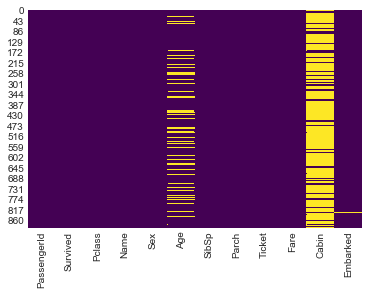

In [14]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

In [15]:
sns.set_style('whitegrid')

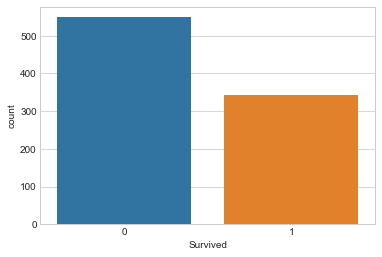

In [16]:
sns.countplot(x='Survived',data=train)

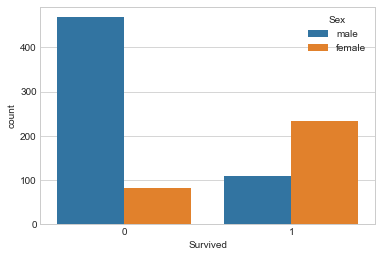

In [17]:
sns.countplot(x='Survived',hue='Sex',data=train)

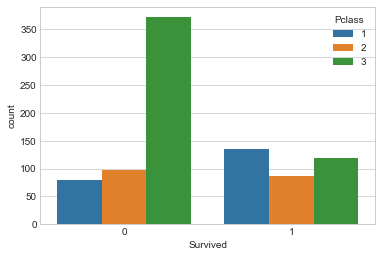

In [18]:
sns.countplot(x='Survived',hue='Pclass',data=train)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


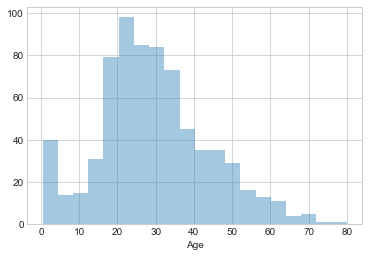

In [19]:
sns.distplot(train['Age'].dropna(),kde=False,bins=20)

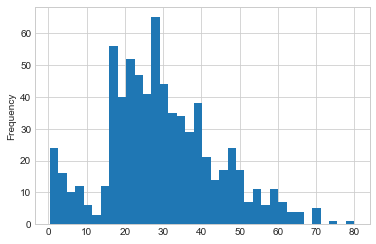

In [20]:
train['Age'].plot.hist(bins=36)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


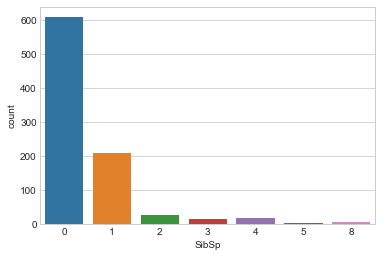

In [22]:
sns.countplot(x='SibSp',data=train)
#sns.countplot(x='Survived',hue='SibSp',data=train)

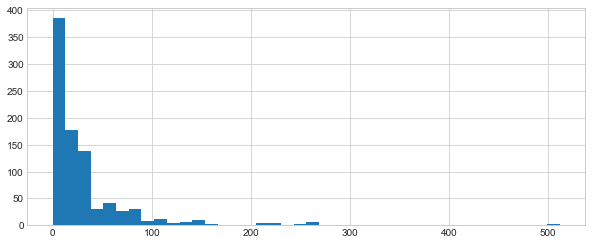

In [23]:
train['Fare'].hist(bins=40,figsize=(10,4))

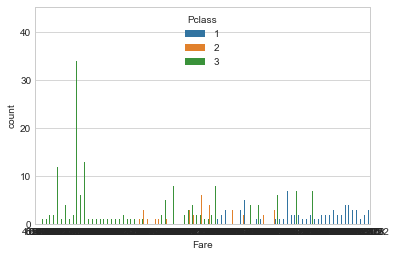

In [19]:
sns.countplot(x='Fare',hue='Pclass',data=train)

In [24]:
import cufflinks as cf

In [25]:
cf.go_offline()

In [26]:
#train['Fare'].iplot(kind='hist',bins=50)

In [27]:
train['Age'].mean()

29.69911764705882

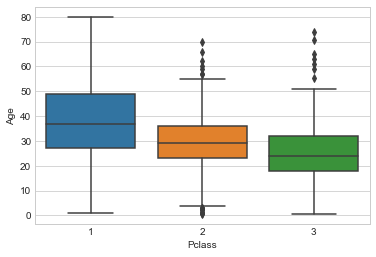

In [28]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [90]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass== 2:
            return 29
        else:
            return 24
    else:
        return Age

In [91]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

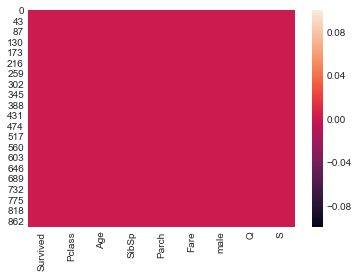

In [92]:
sns.heatmap(train.isnull())

In [32]:
train.drop('Cabin',axis=1,inplace=True)

In [33]:
train.dropna(inplace=True)

In [34]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [35]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [36]:
train=pd.concat([train,sex,embark],axis=1)

In [37]:
train.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,1,0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,1,1,0


In [42]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

KeyError: "labels ['Sex' 'Embarked' 'Name' 'Ticket'] not contained in axis"

In [43]:
train.drop('PassengerId',axis=1,inplace=True)

KeyError: "labels ['PassengerId'] not contained in axis"

In [44]:
 train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [45]:
x=train.drop("Survived",axis=1)
y=train['Survived']

In [46]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [54]:
#By:- Logistic Regression
from sklearn.linear_model import LogisticRegression

In [55]:
logmodel=LogisticRegression()

In [56]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
predictios=logmodel.predict(X_test)

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,predictios))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [65]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(y_test,predictios)

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test,predictios)

0.8089887640449438

In [61]:
#linear Regression
from sklearn.linear_model import LinearRegression

In [62]:
lm=LinearRegression()

In [63]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
predict=lm.predict(X_test)

In [70]:
print(lm.intercept_)

1.341204172578779


In [71]:
lm.coef_

array([-1.77444705e-01, -6.04005865e-03, -3.15530988e-02, -1.78639534e-02,
        1.92581351e-04, -4.91842590e-01, -2.42640966e-02, -5.95635472e-02])

In [75]:
from sklearn.datasets import load_boston

In [77]:
boston=load_boston()

In [80]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [87]:
from sklearn.metrics import mean_absolute_error

In [88]:
mean_absolute_error=mean_absolute_error(y_test,predict)

In [89]:
mean_absolute_error

0.2899713510153329

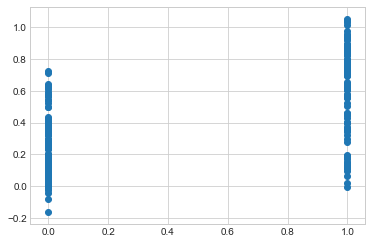

In [91]:
plt.scatter(y_test,predict)

In [92]:
from sklearn.metrics import mean_squared_error

In [97]:
mean_squared_error=mean_squared_error(y_test,predict)

TypeError: 'numpy.float64' object is not callable

In [96]:
mean_squared_error

0.1380423786851562

In [100]:
#test Data
test = pd.read_csv('C:/Users/This PC/Downloads/test.csv')

In [101]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


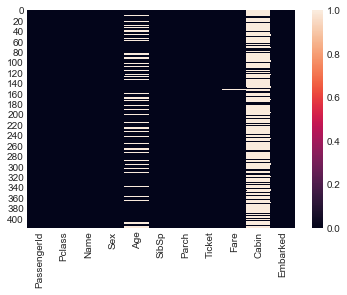

In [113]:
sns.heatmap(test.isnull())

In [123]:
def impute_Age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 24
        else:
            return Age

In [130]:
test['Age']=test[['Age','Pclass']].apply(impute_Age,axis=1)

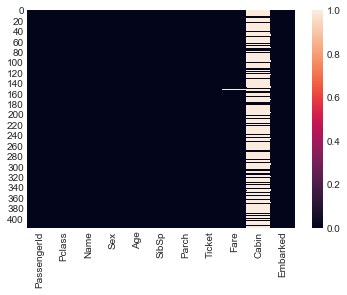

In [131]:
sns.heatmap(test.isnull())

In [132]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,24,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,24,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,29,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,24,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,24,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,24,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,24,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,29,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,24,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,24,2,0,A/4 48871,24.1500,NaN,S
